In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
def read_data(filename):
    data = pd.read_csv(filename, na_values=['-nan(ind)', ' -nan(ind)'])
    data = data.astype({
        'a1': float,
        ' a2': float,
        ' Average Total Energy [K]': float,
        ' Standard Deviation [K]': float,
        ' Energy per particle [erg]': float
    })
    if " -nan(ind)" in data.values:
        print(f"Warning: NaN values found in {filename}")
    data.rename(columns={
        'a1': 'a1',
        ' a2': 'a2',
        ' Average Total Energy [K]': 'Et [K]',
        ' Standard Deviation [K]': 'std [K]',
        ' Energy per particle [erg]': 'e [erg]'
    }, inplace=True)

    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    data["std [erg]"] = data["std [K]"] * 1.380649e-16/200 # Kb* erg/J /Np

    return data

In [3]:
data = read_data('../data/ave_energy_p200_1.csv' )
data = pd.concat([data, read_data('../data/ave_energy_p200_0p01_0p1.csv' )], ignore_index=True)
data = pd.concat([data, read_data('../data/ave_energy200.csv' )], ignore_index=True)

data = data[ data["e [erg]"] < 4e-15]

In [4]:
data.sort_values(by=['e [erg]'])

,a1,a2,Et [K],std [K],e [erg],std [erg]
2600,2.59,5.11,-1237.975,343.4952,-8.542025e-16,2.371232e-16
1460,2.57,5.11,-1226.652,394.5528,-8.463900e-16,2.723695e-16
2305,2.59,5.16,-1223.363,360.3286,-8.441208e-16,2.487437e-16
1996,2.58,5.07,-1221.440,369.0295,-8.427939e-16,2.547501e-16
2703,2.59,4.94,-1221.087,413.7633,-8.425502e-16,2.856309e-16
...,...,...,...,...,...,...
7709,3.25,7.00,5236.096,227.4140,3.612906e-15,1.569895e-16
7643,3.00,10.50,5349.111,463.7997,3.690887e-15,3.201723e-16
7657,3.05,9.50,5412.460,388.5284,3.734597e-15,2.682107e-16
7672,3.10,9.00,5575.404,294.5853,3.847029e-15,2.033594e-16


In [5]:
paper_data = """10,,8,,6,,5,,4, 
X,Y,X,Y,X,Y,X,Y,X,Y
2.2238805970149254,0.4692707349329305,2.3333333333333335,-0.1970464135021096,2.865671641791045,-0.17168902323823898,3.1940298507462686,0.27872662006423604,3.4029850746268657,0.0644341583223127
2.6492537313432836,0.17930285282448538,2.654228855721393,-0.2213237609421248,2.7512437810945274,-0.4167705774922853,3.0796019900497513,-0.06698784558221538,3.2960199004975124,-0.15595440518924353
2.544776119402985,-0.0050066125070847844,2.4328358208955225,-0.41147742301152446,2.646766169154229,-0.48905472636815894,2.9701492537313436,-0.3595314566408463,3.1865671641791047,-0.383941054222558
2.4353233830845773,-0.19311984381888025,2.54228855721393,-0.4550097613199825,2.537313432835821,-0.749319856414132,2.865671641791045,-0.5172586434914036,3.0796019900497513,-0.5872410101391773
2.3308457711442787,-0.22553057497323503,,,2.4303482587064678,-0.6981894325839156,2.7512437810945274,-0.7585427293910195,2.9701492537313436,-0.6842150009446438
,,,,2.3333333333333335,-0.10210970464135005,2.646766169154229,-0.7491813086466402,2.8582089552238807,-0.6634706215756657
,,,,,,2.539800995024876,-0.5974179734240191,2.753731343283582,-0.6256281881730589
,,,,,,2.4353233830845773,-0.2500818691353359,2.646766169154229,-0.47006738459600717
,,,,,,,,2.54228855721393,-0.29741482461112156
"""

df = pd.read_csv(StringIO(paper_data), skiprows=1)  # skip the "10,,8..." row
z_levels = [10,8,6,5,4]
out = pd.concat(
    pd.DataFrame({'x': df.iloc[:, 2*i], 'y': df.iloc[:, 2*i+1], 'z': z_levels[i]})
    for i in range(len(z_levels))
)
out = out.rename(columns={"x": "a1", "y": "E", "z": "a2"})
out = out.dropna().reset_index(drop=True)
out.sort_values(by=['a1'], inplace=True)

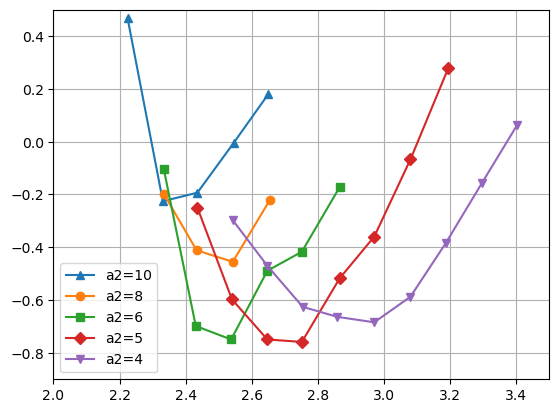

In [6]:
fig, ax = plt.subplots()

a2_10 = []
a2_8 = []
a2_6 = []
a2_5 = []
a2_4 = []

for (a1, E, a2) in out.values:
    if( np.isclose(a2, 10)):
        a2_10.append((a1, E))
    elif( np.isclose(a2, 8)):
        a2_8.append((a1, E))
    elif( np.isclose(a2, 6)):
        a2_6.append((a1, E))
    elif( np.isclose(a2, 5)):
        a2_5.append((a1, E))
    elif( np.isclose(a2, 4)):
        a2_4.append((a1, E))
    else:
        print("WTF")

ax.plot(*zip(*a2_10), marker="^", label="a2=10")
ax.plot(*zip(*a2_8), marker="o", label="a2=8")
ax.plot(*zip(*a2_6), marker="s", label="a2=6")
ax.plot(*zip(*a2_5), marker="D", label="a2=5")
ax.plot(*zip(*a2_4), marker="v", label="a2=4")

ax.set_xlim(2, 3.5)
ax.set_ylim(-0.9, 0.5)
ax.grid(True)
ax.legend()

Text(0, 0.5, 'Count')

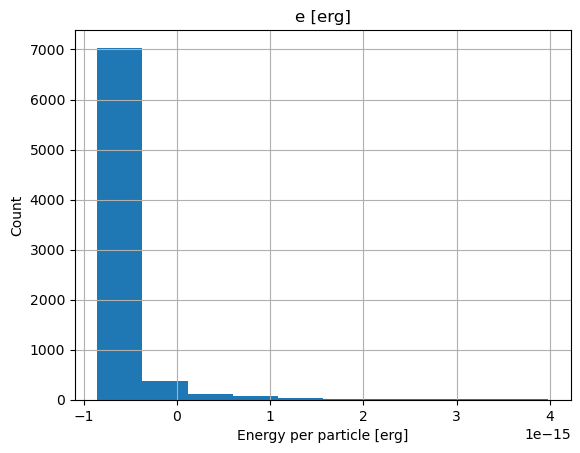

In [7]:
data.hist(column='e [erg]', bins=10)
plt.xlabel('Energy per particle [erg]')
plt.ylabel('Count')

<Axes: xlabel='a1', ylabel='a2'>

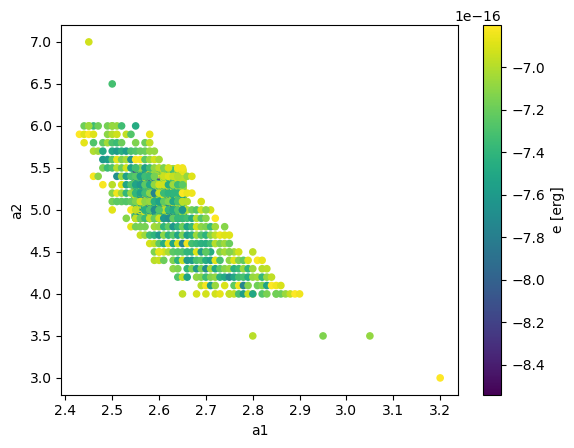

In [8]:
compatible = (-0.86e-15 < data['e [erg]']) & (data['e [erg]']< -0.68e-15)
data[compatible].plot.scatter(x='a1', y='a2', c='e [erg]', cmap='viridis')

<Axes: xlabel='a1', ylabel='a2'>

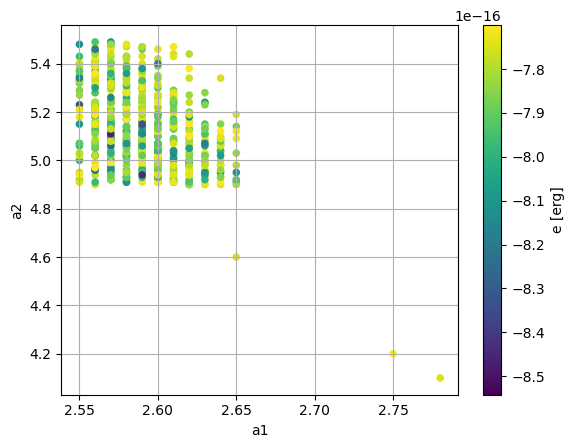

In [9]:
compatible = (data['e [erg]']< -0.77e-15)
data[compatible].plot.scatter(x='a1', y='a2', c='e [erg]', cmap='viridis', grid=True)

In [17]:
x = data["a1"]
y = data["a2"]
z = data["e [erg]"]*1e15
err = data["std [erg]"]*1e15/np.sqrt(data.shape[0])

In [21]:
idx = np.argmin(z)
print(f"Minimum energy per particle: {z[idx]:.3f}+-{err[idx]:.3f} x10^{-15} erg at a1={x[idx]:.3f}, a2={y[idx]:.3f}")

Minimum energy per particle: -0.854+-0.003 x10^-15 erg at a1=2.590, a2=5.110


In [22]:
# At the top of your notebook
%matplotlib qt

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot triangulated surface
ax.plot_trisurf(x, y, z, cmap='viridis', alpha=0.8, edgecolor='none')


ax.plot(out.values[:,0], out.values[:,2], out.values[:,1], 'ro')


ax.set_xlabel(r'$a_1$')
ax.set_ylabel(r'$a_2$')
ax.set_zlabel(r'Energy per particle [$10^{15}$erg]')



plt.show()